# Day 14 | Start Coding | Missing Indicator Imputation


# Import Libraries

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.impute import MissingIndicator,SimpleImputer

# Import Dataset

In [61]:
df = pd.read_csv('train (2).csv',usecols=['Age','Fare','Survived'])

In [62]:
df


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [63]:

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [64]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

# Create X & Y

In [65]:
x = df.drop(columns=['Survived'])
y = df['Survived']

# train test split

In [66]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [67]:

x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


# New column create in Both Train & Test

In [68]:

x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']


In [69]:

x_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [70]:
x_test.head()

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0


In [71]:
x_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [72]:
x_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


# Replace Value Age_imputed

In [73]:
# TRAIN
mask_train = x_train['Age_imputed'].isnull()
n_train = mask_train.sum()

x_train.loc[mask_train, 'Age_imputed'] = (
    x_train['Age'].dropna().sample(n_train, random_state=42).values
)

# TEST
mask_test = x_test['Age_imputed'].isnull()
n_test = mask_test.sum()

x_test.loc[mask_test, 'Age_imputed'] = (
    x_train['Age'].dropna().sample(n_test, random_state=42).values
)


# Review Sample Random Generate Value


In [74]:

x_train['Age'].dropna().sample(1).values


array([38.])

In [75]:

x_train['Age'].isnull().sum()

np.int64(148)

In [76]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([21.  , 36.  , 35.  , 30.  , 41.  , 35.  , 40.  , 42.  , 59.  ,
       49.  , 16.  , 29.  , 25.  , 32.  , 25.  , 16.  , 36.  , 21.  ,
       31.  , 50.  , 40.  , 18.  , 40.5 , 22.  , 11.  , 22.  , 25.  ,
       30.  , 13.  ,  3.  , 39.  , 22.  , 38.  , 16.  , 30.  , 41.  ,
        4.  , 21.  , 18.  ,  2.  , 20.  , 31.  , 30.  ,  4.  , 24.  ,
       47.  , 20.  , 64.  , 24.  , 17.  , 19.  , 26.  , 48.  , 36.  ,
       34.  , 21.  , 23.  , 23.  , 54.  , 36.  , 33.  , 51.  , 36.  ,
       51.  , 16.  , 19.  , 18.  , 58.  , 48.  , 36.  , 32.  , 32.5 ,
       18.  , 27.  , 18.  , 25.  ,  2.  , 24.  , 45.  , 35.  , 40.  ,
       26.  , 31.  , 29.  , 56.  , 46.  , 30.  , 27.  , 35.  ,  4.  ,
       54.  , 30.  , 59.  , 34.  , 23.  , 30.  , 51.  , 25.  , 34.  ,
        0.75, 18.  , 47.  , 29.  , 24.  , 17.  , 24.  , 62.  , 60.  ,
       45.5 , 35.  , 15.  , 11.  , 31.  , 36.  ,  8.  , 62.  , 45.  ,
       39.  , 23.  , 16.  , 32.  , 24.  , 19.  , 50.  , 31.  , 42.  ,
       28.  , 40.  ,

# compare original Age and imputute Age

In [77]:

x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,18.0
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


# Compare Original Age and Imputed Age

C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_16280\1098431515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_16280\1098431515.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

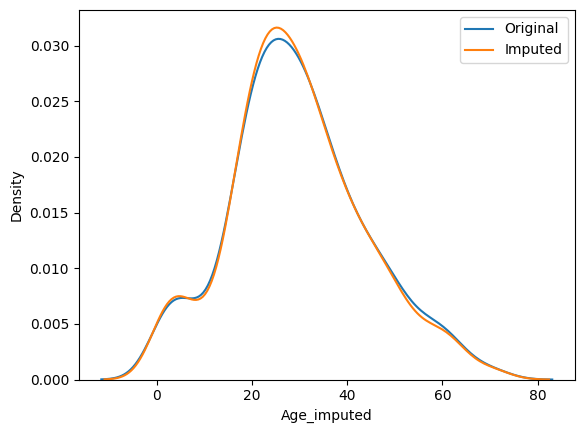

In [78]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)
plt.legend()
plt.show()

# Compare Variable Variance

In [79]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  200.02896637747125


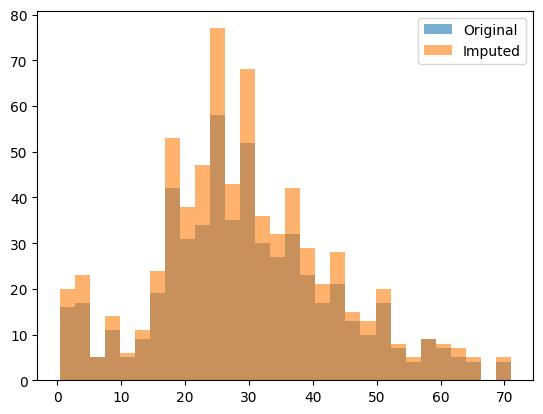

In [80]:
import matplotlib.pyplot as plt

plt.hist(x_train['Age'].dropna(), bins=30, alpha=0.6, label='Original')
plt.hist(x_train['Age_imputed'], bins=30, alpha=0.6, label='Imputed')
plt.legend()
plt.show()


C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_16280\1721414442.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


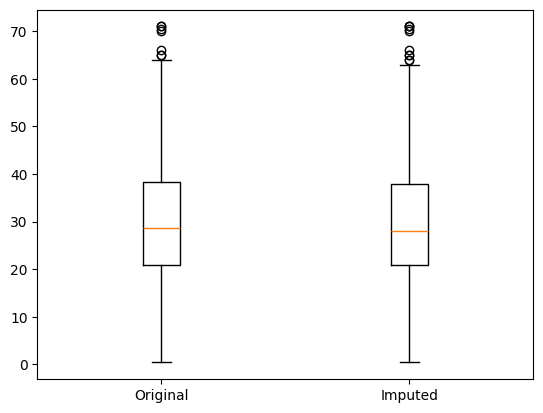

In [81]:
plt.boxplot([
    x_train['Age'].dropna(),
    x_train['Age_imputed']
], labels=['Original', 'Imputed'])
plt.show()
